0.6605582452037148
[1508.711908877136]


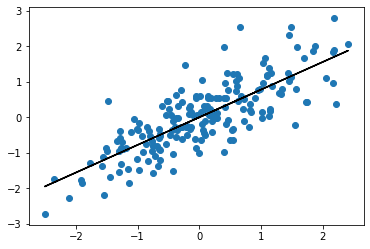

In [7]:
from math import sqrt
import matplotlib.pyplot as plt
from random import randrange
import numpy as np
import pandas as pd

class Linear_Regression():
    
    # Intializing value
    def __init__(self):
        
        self.X = []
        self.y = []
        self.X_train = []
        self.y_train = []
        self.X_test = []
        self.y_test = []
        self.x_mean = 0.0
        self.y_mean = 0.0
        self.x_std = 0.0
        self.y_std = 0.0
        self.m = 0.0
        self.b = 0.0
        self.starting_b = 0 
        self.starting_m = 0 
        self.learning_rate = 0.0001
        self.num_iteartions = 50000
    
    # Calculate mean
    def mean(self,values):
        return sum(values) / float(len(values))
    
    # Calculate Standard Deviation
    def standard_deviation(self):
        x_total = y_total = 0
        n = len(self.X)
        
        for i in range(n):
            x_total = x_total + ((self.X[i] - self.x_mean) ** 2)
            y_total = y_total + ((self.y[i] - self.y_mean) ** 2)
        
        x_std = sqrt(x_total/n)
        y_std = sqrt(y_total/n)
        return x_std,y_std
    
    # Data Standardization Function
    def standarization(self):
        self.x_mean = self.mean(self.X)
        self.y_mean = self.mean(self.y)
        self.x_std,self.y_std = self.standard_deviation()
        
        new_x = []
        new_y = []
        for i in range(len(self.X)):
            new_x.append((self.X[i] - self.x_mean)/ self.x_std)
            new_y.append((self.y[i] - self.y_mean)/ self.y_std)
        self.X = new_x
        self.y = new_y
        
    
    # Evaluate an algorithm using a train/test split
    def train_test_split(self,X, y, split):
        self.X = X
        self.y = y
        self.standarization()
        
        X_train = list()
        y_train = list()
        train_size = split * len(X)
        X_test = list(self.X)
        y_test = list(self.y)
        
        while len(X_train) < train_size:
            index = randrange(len(X_test))
            X_train.append(X_test.pop(index))
            y_train.append(y_test.pop(index))
        
        return X_train,X_test,y_train,y_test
    
    
    # Calculate r2 error
    def score(self,X,y):
        self.X_test = X
        self.y_test = y
        sum_error = 0.0
        sum_square_error = 0.0
        
        mean_value = np.mean(self.y_test)
        predicted = self.prediction_value(self.X_test)
        
        for i in range(len(self.y_test)):
            prediction_error = predicted[i] - self.y_test[i]
            sum_error = sum_error + ((self.y_test[i] - mean_value)**2)
            sum_square_error = sum_square_error + (prediction_error ** 2)
        
        r2 = 1 - (sum_square_error/sum_error)
        return r2
        
    # Simple linear regression algorithm
    def fit(self,X,y):
        self.X_train = X
        self.y_train = y
        b,m = self.gradient_descent_runner()
        self.b = b
        self.m = m
        self.linear_plot()
    
    def step_gradient(self, b_current, m_current):
        b_gradient = 0
        m_gradient = 0
        N = float(len(self.X_train))
        
        for i in range(0, len(self.X_train)):
            b_gradient = b_gradient + (-2/N) * (self.y_train[i] - (m_current * self.X_train[i] + b_current))
            m_gradient = m_gradient + (-2/N) * self.X_train[i] * (self.y_train[i] - (m_current * self.X_train[i] + b_current))
        
        new_b = b_current - (self.learning_rate * b_gradient)
        new_m = m_current - (self.learning_rate * m_gradient) 
        
        return [new_b,new_m]
    
    # Gradient Descent
    def gradient_descent_runner(self):
        b = self.starting_b
        m = self.starting_m
        
        for i in range(self.num_iteartions):
            b,m = self.step_gradient(b, m)
        
        return [b,m]
    
    # Prediction of some values
    def prediction_value(self,X):
        predictions = list()
        
        for row in X:
            predict_y = self.b + self.m * row
            predictions.append(predict_y)
        
        return predictions
    
    # Predict function
    def predict(self,X):
        predictions = []
        
        for i in X:
            X_new = (i - self.x_mean)/self.x_std
            predict_y = self.b + self.m * X_new
            predictions.append((predict_y * self.y_std) + self.y_mean)
        
        return predictions
            
    
    # Plotting graph
    def linear_plot(self):
        plt.scatter(self.X_train,self.y_train)
        plt.plot(self.X_train,self.prediction_value(self.X_train),c="black")


if __name__ == "__main__":
    
    data = pd.read_csv("headbrain.csv")
    data = data.drop(["Gender","Age Range"],axis = 1)
    x,y = np.array(data["Head Size(cm^3)"]),np.array(data["Brain Weight(grams)"])
    
    model = Linear_Regression()
    X_train,X_test,y_train,y_test  = model.train_test_split(x, y, .8)
    model.fit(X_train,y_train)
    print(model.score(X_test,y_test)) 
    print(model.predict([4512]))